In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [3]:
# TODO define gaussian function here
# Taken from lecture note 
def gaussian(x, mean, var, amp = 1):
    return amp * (1/np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))

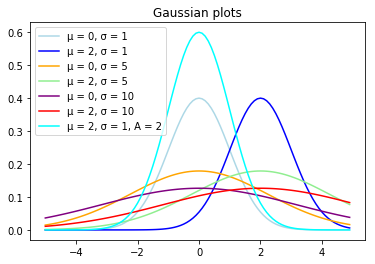

In [4]:
# TODO plot gaussians here
# Greek alphabet unicode from https://gist.github.com/beniwohli/765262
x = np.arange(-5, 5, 0.1)
y0 = gaussian(x, 0, 1)
y1 = gaussian(x, 2, 1)
y2 = gaussian(x, 0, 5)
y3 = gaussian(x, 2, 5)
y4 = gaussian(x, 0, 10)
y5 = gaussian(x, 2, 10)
y6 = gaussian(x, 0, 1, amp = 1.5)
plt.plot(x, y0, color='lightblue', label='\u03BC = 0, \u03C3 = 1')
plt.plot(x, y1, color='blue', label='\u03BC = 2, \u03C3 = 1')
plt.plot(x, y2, color='orange', label='\u03BC = 0, \u03C3 = 5')
plt.plot(x, y3, color='lightgreen', label='\u03BC = 2, \u03C3 = 5')
plt.plot(x, y4, color='purple', label='\u03BC = 0, \u03C3 = 10')
plt.plot(x, y5, color='red', label='\u03BC = 2, \u03C3 = 10')
plt.plot(x, y6, color='cyan', label='\u03BC = 2, \u03C3 = 1, A = 2')
plt.legend()
plt.title('Gaussian plots')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


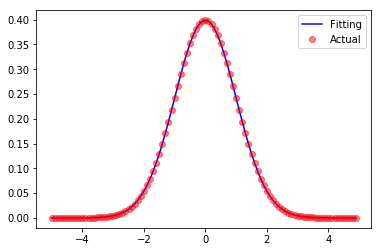

In [5]:
# TODO fit gaussians, with known parameters, here
from scipy import optimize as op
params, cov = op.curve_fit(gaussian, x, y0)
# TODO plot result
plt.plot(x, gaussian(x, *params), color='blue', label='Fitting')
plt.plot(x, y0, color='red', label='Actual', alpha = 0.5, marker='o', linestyle='none')
plt.legend()
plt.show()

In [6]:
# TODO: load data here
dtype1 = np.dtype([('hx', np.float64), ('hy', np.float64)])
data = np.loadtxt('HDalpha_data', unpack=True)

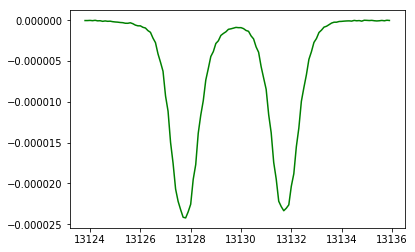

In [7]:
# TODO: plot it
plt.plot(*data, color='green')
plt.show()

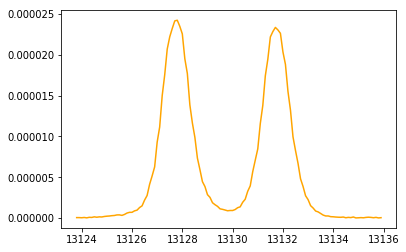

In [8]:
# TODO: plot data as emission signal
xdata, ydata = data
plt.plot(xdata, -ydata, color='orange')
plt.show()

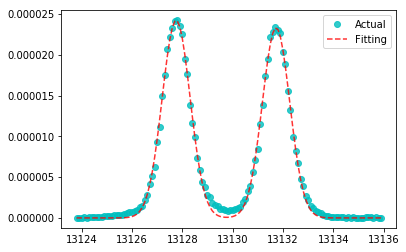

In [9]:
# TODO: fit a function to this data and plot it
def double_gaussian(x, u1, u2, s1, s2, a1, a2):
    return gaussian(x, u1, s1, a1) + gaussian(x, u2, s2, a2)

params, cov = op.curve_fit(double_gaussian, xdata, -ydata, p0=[13128, 13132, 0.5, 0.5, 0.000025, 0.000025])
plt.plot(xdata, -ydata, 'co', alpha=0.8, label='Actual')
plt.plot(xdata, double_gaussian(xdata, *params), 'r--', alpha=0.8, label='Fitting')
plt.legend()
plt.show()

# Part 2

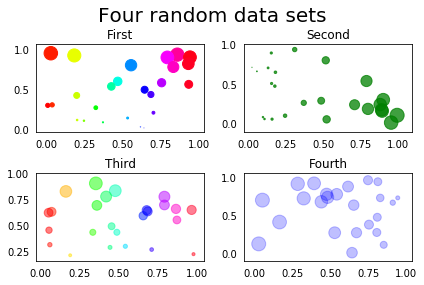

<Figure size 720x648 with 0 Axes>

In [10]:
# TODO: part 2
from matplotlib.backends.backend_pdf import PdfPages

x_ran = np.random.rand(100)
y_ran = np.random.rand(100)
f, ((sp0, sp1),(sp2, sp3)) = plt.subplots(2,2)
area_x = np.pi * (8 * x_ran)**2
area_y = np.pi * (8 * y_ran)**2
color_x = x_ran * 100
color_y = y_ran * 100
sp0.set_title('First')
sp0.scatter(x_ran[:25], y_ran[:25], alpha=1 ,c=color_x[:25], s=area_y[:25], cmap='hsv')
sp0.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False)
sp1.set_title('Second')
sp1.scatter(x_ran[25:50], y_ran[25:50], alpha=0.75, c='green', s=area_x[25:50])
sp1.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False)
sp2.set_title('Third')
sp2.scatter(x_ran[50:75], y_ran[50:75], alpha = 0.5, c=color_x[50:75], s=area_y[50:75], cmap='hsv')
sp2.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False)
sp3.set_title('Fourth')
sp3.scatter(x_ran[75:], y_ran[75:], alpha=0.25, c='blue', s=max(area_x[75:])-area_x[75:])
sp3.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False)
plt.tight_layout()
plt.suptitle('Four random data sets', fontsize=20) #supertitle
plt.subplots_adjust(top=0.85)
plt.figure(figsize=(10,9))
pp = PdfPages('part2.pdf')
pp.savefig(f)
pp.close()
plt.show()

# Part 3

In [11]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

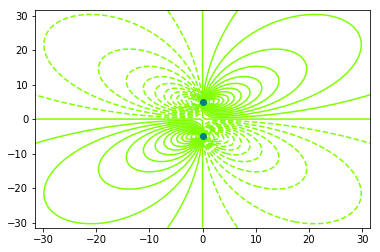

In [12]:
# TODO create arrays of information
x_pos = [0, 0]
y_pos = [5, -5]
charges = [1, -1]
X = np.linspace(-31.5, 31.5, 64)
Y = np.linspace(-31.5, 31.5, 64)
# TODO get flux
flux = flux_for_dipole(x_pos, y_pos, charges, X,Y)
# TODO plot contours of the flux
plt.plot(x_pos, y_pos, color='teal', marker='o', linestyle='none')
plt.contour(X, Y, flux, 30, colors='chartreuse')
plt.show()